# Revenue Maximization Task

## Objective:
A core part of Credit business model si upgrading existing customers whti value-add products and services. This can occur ni two ways: either as an upsellincreasing the daily rate ot a customer currently in-payment) or as an upgrade(adding additional days onto aloan that has already been completed).
The number of upgrade and upsell loans we're able to sel are dependent on anumber of factors; the size of the active customer base, eligibility, including both credit performance (we only sell these loans to customers with a good repayment history) and timing (customers are only eligible at certain points ni their lifecycle) and the conversion rate (what %of eligible customers decide to purchase an additional loan).
In order to maximize profitability and properly forecast inventory requirements, we have to undertake 2 important (and related) exercises: determining the business rules that govern what product we sell and when, and, out of this, forecast units sold by month.

## The Exercise:
In this exercise, you will determine the mix of cash loans (an upsell loan) and Product upgrades (an upgrade loan) we'll sell to Current customers ni 2023 ni order to maximize upgrade +upsell profitability (Classics Assets Products are the core Mobile Phone, Tablet, Decoder, Radio, phone-charging product).

Dummy sales data through 2023 is available at Data/data.csv. Afew simplifying assumptions:
* Aloan that is eligible for an upgrade wil take 400 days from purchase to date of finished payment, assuming no upsell loans
* Each upsell loan lasts for 150 days and extends the date of finished payment of the underlying loan by 50 days
* TV upgrade loans aren't eligible for upsell loans
* Loans that have finished payment aren't eligible for cash loans
* TV upgrade loans must be purchased the day the Classic loan is finished (e.g. can't sell to 'old' finished payment customers)
* 90% of customers are eligible for a cash loan
* Neither cash loans nor TV upgrades have any limitations on the maximum or minimum volumes
* %57 of customers who haven't purchased any upsel olans are eligible for aVT upgrade, htsi number decreases by 02 percentage points for each cash loan they ve purchased
* 90% of customers ofered a cash olan wli purchase, %05 fo customers ofered a TV upgrade wil purchase
* Cash olans yield aprofit fo$25; TV upgrades yield a porfit fo $150 (accounted for on day of sale)
* Use an annual discount rate of %51 • Ignore any impact post-2023

### Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

### Data loading

In [7]:
file_path = 'Data/data.csv'
df = pd.read_csv(file_path)

df.head()

,Month,Volume (units)
0,1/31/19,10000
1,2/28/19,"10,200"
2,3/31/19,"10,404"
3,4/30/19,"10,612"
4,5/31/19,"10,824"


## Data Exploration

In [9]:
# Checking the data types for each column
print(df.dtypes)

Month             object
Volume (units)    object
dtype: object


In [10]:
# Checking for the missing values
print(df.isnull().sum())

Month             0
Volume (units)    0
dtype: int64


In [11]:
# checking for data duplicates
print(df.duplicated().sum())

0


In [12]:
# checking for data desc
print(df.describe())

          Month Volume (units)
count        60             60
unique       60             60
top     1/31/19          10000
freq          1              1


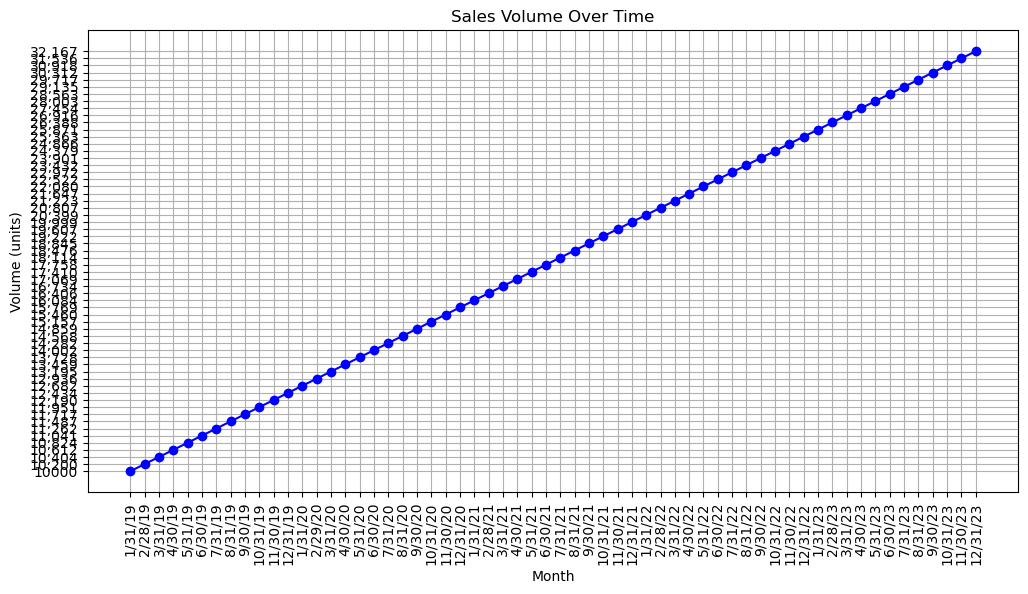

In [13]:
# Exploring the distribution of sales volume over time
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['Volume (units)'], marker='o', color='b')
plt.title('Sales Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Volume (units)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Data Pre-Processing

In [15]:
# Removing commas from the 'Volume (units)' column values
df['Volume (units)'] = df['Volume (units)'].str.replace(',', '')

# Converting 'Month' column to datetime datatype
df['Month'] = pd.to_datetime(df['Month'], format='%m/%d/%y')

# Converting 'Volume (units)' column to numeric datatype
df['Volume (units)'] = pd.to_numeric(df['Volume (units)'])

# Checking the updated data types
print(df.dtypes)

Month             datetime64[ns]
Volume (units)             int64
dtype: object


In [16]:
# checking the updated df
df.head()

,Month,Volume (units)
0,2019-01-31,10000
1,2019-02-28,10200
2,2019-03-31,10404
3,2019-04-30,10612
4,2019-05-31,10824
